In [5]:
import pandas as pd

data = pd.read_csv('music.csv')
data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [5]:
data.describe()


,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
#input data set
x = data.drop(columns=['genre'])
x

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [7]:
#output data set
y=data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [12]:
#building the model and predicting
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x , y)
predictions = model.predict([[32,1],[36,0]])   #1-male, 0-female
predictions

array(['Classical', 'Classical'], dtype=object)

In [18]:
#checking the accuracy of the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train , y_train)
predictions = model.predict(x_test)   #1-male, 0-female
score = accuracy_score(y_test, predictions)
score

1.0

In [20]:
#model persistent(ie saving the trained model)
from sklearn.externals import joblib
joblib.dump(model,'music_recommender.joblib')


['music_recommender.joblib']

In [22]:
#model persistent(ie directly loading the trained model and predicting)
model = joblib.load('music_recommender.joblib')
predictions = model.predict([[32,0]])
predictions

array(['Classical'], dtype=object)

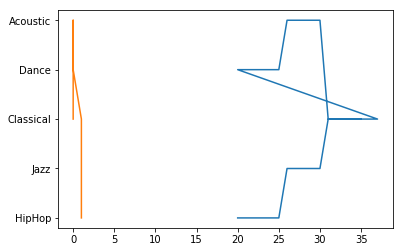

In [12]:
#plotting using matplotlib
import matplotlib.pyplot as plt
x = data.drop(columns=['genre'])
x
y=data['genre']
y
a = plt.plot(x,y)
a